# Distance plots

Notebook to create plots that show the distance as well as the invocation of the base controller over time.

In [54]:
import pathlib

baseDir = pathlib.Path().resolve()
infilename = str(baseDir) + "/../cmake-build-release/bin/minimal_distances.txt"

def preprocessData():
    data = []
    with open(infilename) as file:
        data = [{'it': int(line.split(',')[0]), 'dist':float(line.split(',')[3]), 'adv':bool(int(line.split(',')[4])), 'training':bool(int(line.split(',')[5]))} for line in file.readlines() if '#' not in line]
    return data

data = preprocessData()
print(str(data))

[{'it': 1, 'dist': 0.126987, 'adv': True, 'training': False}, {'it': 2, 'dist': 0.131155, 'adv': True, 'training': False}, {'it': 3, 'dist': 0.132652, 'adv': True, 'training': False}, {'it': 4, 'dist': 0.13415, 'adv': True, 'training': False}, {'it': 5, 'dist': 0.135648, 'adv': True, 'training': False}, {'it': 6, 'dist': 0.137145, 'adv': True, 'training': False}, {'it': 7, 'dist': 0.138643, 'adv': True, 'training': False}, {'it': 8, 'dist': 0.140141, 'adv': True, 'training': False}, {'it': 9, 'dist': 0.13852, 'adv': True, 'training': False}, {'it': 10, 'dist': 0.136566, 'adv': True, 'training': False}, {'it': 11, 'dist': 0.134612, 'adv': True, 'training': False}, {'it': 12, 'dist': 0.132657, 'adv': True, 'training': False}, {'it': 13, 'dist': 0.130703, 'adv': True, 'training': False}, {'it': 14, 'dist': 0.128749, 'adv': True, 'training': False}, {'it': 15, 'dist': 0.126794, 'adv': True, 'training': False}, {'it': 16, 'dist': 0.12484, 'adv': True, 'training': False}, {'it': 17, 'dist': 

In [55]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot(data):
    fig, ax = plt.subplots()
    
    lines = []
    colors = []
    
    useAC = data[0]['adv']
    segment = []
    colormap = [(1, 0, 0, 1), (0, 1, 0, 1)]
    color = colormap[0]
    for x in data:
        if (x['adv'] and useAC) or (not x['adv'] and not useAC):
            segment.append((x['it'], x['dist']))
        elif (x['adv'] and not useAC) or (not x['adv'] and useAC):
            lines.append(segment)
            colors.append(color)
            segment = []
            color = colormap[0] if color == colormap[1] else colormap[0]
            useAC = not useAC
            segment.append((x['it'], x['dist']))
    
    # remove the last segment, if it is empty
    if len(lines[len(lines)-1]) == 0:
        lines = lines[:-1]
        colors = colors[:-1]
    
    print(str(lines))
    print(str(colors))
    assert(len(lines) == len(colors))
    
    lc = LineCollection(lines, colors=colors)
    
    ax.add_collection(lc)
    plt.show()

[[(1, 0.126987), (2, 0.131155), (3, 0.132652), (4, 0.13415), (5, 0.135648), (6, 0.137145), (7, 0.138643), (8, 0.140141), (9, 0.13852), (10, 0.136566), (11, 0.134612), (12, 0.132657), (13, 0.130703), (14, 0.128749), (15, 0.126794), (16, 0.12484), (17, 0.122886), (18, 0.12454), (19, 0.126194), (20, 0.127848), (21, 0.129502), (22, 0.131157), (23, 0.132811), (24, 0.134465), (25, 0.136119), (26, 0.137773), (27, 0.139427), (28, 0.140227), (29, 0.139009), (30, 0.137792), (31, 0.136574), (32, 0.135357), (33, 0.134139), (34, 0.132921), (35, 0.131704), (36, 0.130486), (37, 0.129269), (38, 0.128051), (39, 0.126834), (40, 0.125616), (41, 0.124399), (42, 0.120503), (43, 0.116607), (44, 0.194167), (45, 0.224058), (46, 0.251312), (47, 0.248936), (48, 0.211231), (49, 0.173526), (50, 0.13582), (51, 0.105067), (52, 0.0743131)], [(54, 0.0668822), (55, 0.0658278)], [(57, 0.0552836), (58, 0.0500116)], [], [(61, 0.0585982), (62, 0.0625012), (63, 0.0664042), (64, 0.0703072), (65, 0.0742103), (66, 0.0781133),

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

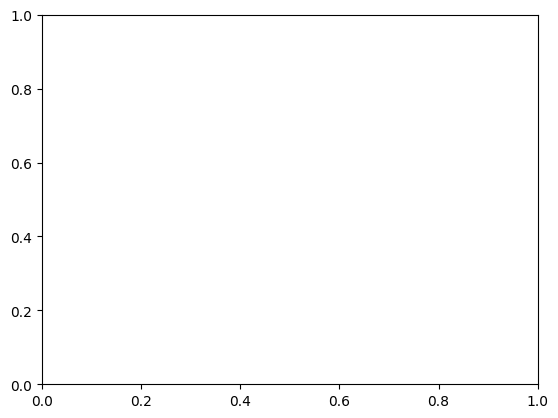

In [56]:
preprocessData()
plot(data)